# Udacity Self-Driving Car Engineer Nanodegree Program¶


##                                               Vehicle Detection Project

## Extract data

Number of cars in data base 8792
Number of noncars in data base 8968


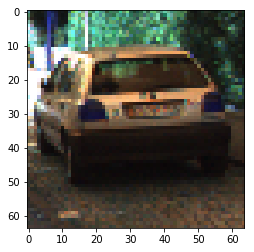

In [1]:
'''from skimage.feature import hog
from sklearn.svm import LinearSVC
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label

from moviepy.editor import VideoFileClip
from IPython.display import HTML

import pickle
import cv2
import glob
'''

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import glob
from shutil import copyfile
from skimage.feature import hog
import time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
%matplotlib inline
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


car_imgs=glob.glob('data/vehicles/*/*.png')
noncar_imgs=glob.glob('data/non-vehicles/*/*.png')
print("Number of cars in data base", len(car_imgs))
print("Number of noncars in data base", len(noncar_imgs))
## since the size of non car vehicles are not the same as car vehicles, we add random car
#if (len(noncar_imgs)!=len(car_imgs)):
#    for i in range(len(noncar_imgs)-len(car_imgs)):
#        car_ind = np.random.randint(0, len(car_imgs))
#        copyfile(car_imgs[car_ind], 'data/vehicles/added_by_mehdi/added'+str(i)+'.png')

    
#car_imgs=glob.glob('data/vehicles/*/*.png')
#noncar_imgs=glob.glob('data/non-vehicles/*/*.png')
#print("Number of cars in data base after insersion", len(car_imgs))
plt.imshow(cv2.imread(car_imgs[np.random.randint(0, len(car_imgs))]))


## Histogram of Oriented Gradients (HOG) and spacial and color histogram

In [2]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

    
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)): 
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    # we need just the histgogram not the bins edge therefore we add [0]
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

print ("compiled!")

compiled!


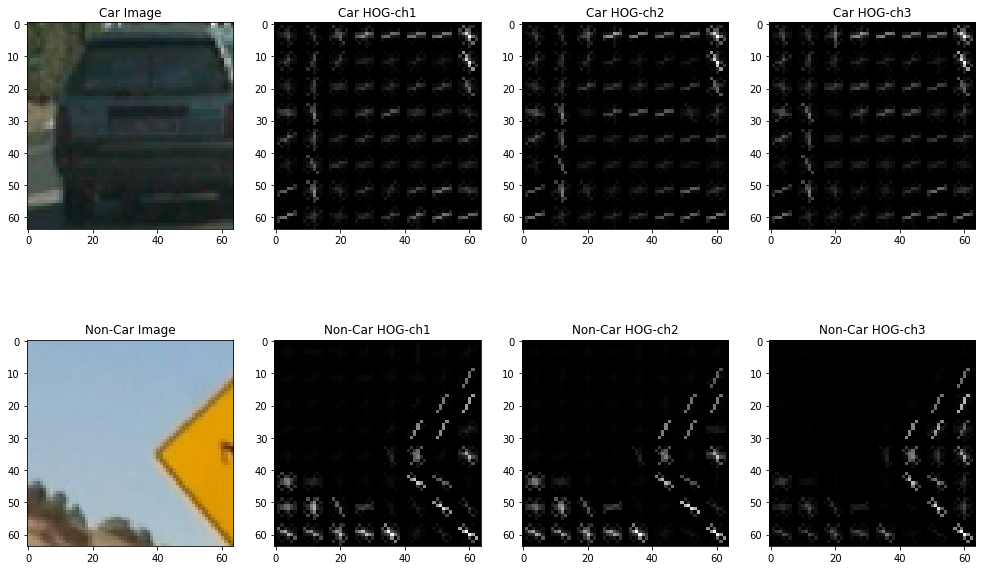

In [3]:

car_sample=mpimg.imread(car_imgs[1234]) 
noncar_sample=mpimg.imread(noncar_imgs[1234])
features,car_sample_hot_on_ch1=get_hog_features(car_sample[:,:,0], orient=9, pix_per_cell=8, cell_per_block=4,vis=True, feature_vec=True)
features,car_sample_hot_on_ch2=get_hog_features(car_sample[:,:,1], orient=9, pix_per_cell=8, cell_per_block=4,vis=True, feature_vec=True)
features,car_sample_hot_on_ch3=get_hog_features(car_sample[:,:,2], orient=9, pix_per_cell=8, cell_per_block=4,vis=True, feature_vec=True)
features,noncar_sample_hot_on_ch1=get_hog_features(noncar_sample[:,:,0], orient=9, pix_per_cell=8, cell_per_block=4,vis=True, feature_vec=True)
features,noncar_sample_hot_on_ch2=get_hog_features(noncar_sample[:,:,1], orient=9, pix_per_cell=8, cell_per_block=4,vis=True, feature_vec=True)
features,noncar_sample_hot_on_ch3=get_hog_features(noncar_sample[:,:,2], orient=9, pix_per_cell=8, cell_per_block=4,vis=True, feature_vec=True)

f, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(17,10))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_sample)
ax1.set_title('Car Image', fontsize=12)
ax2.imshow(car_sample_hot_on_ch1, cmap='gray')
ax2.set_title('Car HOG-ch1', fontsize=12)
ax3.imshow(car_sample_hot_on_ch2, cmap='gray')
ax3.set_title('Car HOG-ch2', fontsize=12)
ax4.imshow(car_sample_hot_on_ch3, cmap='gray')
ax4.set_title('Car HOG-ch3', fontsize=12)
ax5.imshow(noncar_sample)
ax5.set_title('Non-Car Image', fontsize=12)
ax6.imshow(noncar_sample_hot_on_ch1, cmap='gray')
ax6.set_title('Non-Car HOG-ch1', fontsize=12)
ax7.imshow(noncar_sample_hot_on_ch2, cmap='gray')
ax7.set_title('Non-Car HOG-ch2', fontsize=12)
ax8.imshow(noncar_sample_hot_on_ch3, cmap='gray')
ax8.set_title('Non-Car HOG-ch3', fontsize=12)

## Extract Features

In [4]:

def get_feature(feat_img,orient, pix_per_cell, cell_per_block, hog_channel,
                     spacial_size, nbins, bins_range,
                     HOG_feature,Spacial_feature,Histogram_feature):
   # final_features = []
    if HOG_feature == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feat_img.shape[2]):
                feat=get_hog_features(feat_img[:,:,channel], orient,
                                    pix_per_cell, cell_per_block,vis=False, feature_vec=True)
                hog_features.append(feat)
            hog_features = np.ravel(hog_features)
           # print(len(hog_features))
        if hog_channel == 0 or hog_channel == 1 or hog_channel == 2:
            feature_image = cv2.cvtColor(feat_img, cv2.COLOR_LUV2RGB)
            feature_image = cv2.cvtColor(feat_img, cv2.COLOR_RGB2GRAY)
            hog_features = get_hog_features(feature_image[:,:], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
    #    final_features.append(hog_features)
    if Spacial_feature == True:
        spacial_feature = bin_spatial(feat_img, size=spacial_size)
    #    final_features.append(spacial_feature)
    if Histogram_feature == True:
        histogram_feature = color_hist(feat_img, nbins=nbins, bins_range=bins_range)
    #    final_features.append(histogram_feature)
    if Histogram_feature == True and Spacial_feature == True and HOG_feature == True:
        final_features=np.concatenate((histogram_feature, spacial_feature))
    return  final_features   
'''
    if len(hog_features) > 0 and len(spacial_feature) > 0  and len(histogram_feature) > 0 :  
        features.append(np.concatenate((hog_features,spacial_feature,histogram_feature)))
    elif len(hog_features) <= 0 and len(spacial_feature) > 0  and len(histogram_feature) > 0 :  
        features.append(np.concatenate((spacial_feature,histogram_feature)))
    elif len(hog_features) > 0 and len(spacial_feature) <= 0  and len(histogram_feature) > 0 :  
        features.append(np.concatenate((hog_features,histogram_feature)))
    elif len(hog_features) > 0 and len(spacial_feature) > 0  and len(histogram_feature) <= 0 :  
        features.append(np.concatenate((hog_features,spacial_feature)))
    elif len(hog_features) <= 0 and len(spacial_feature) <= 0  and len(histogram_feature) > 0 :  
        features.append(histogram_feature)
    elif len(hog_features) <= 0 and len(spacial_feature) > 0  and len(histogram_feature) <= 0 :  
        features.append(spacial_feature)
    elif len(hog_features) > 0 and len(spacial_feature) <= 0  and len(histogram_feature) <= 0 :  
        features.append(hog_features)

def extract_features(imgs, cspace='RGB', orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spacial_size=(32, 32), nbins=32, bins_range=(0, 256),
                     HOG_feature=True,Spacial_feature=True,Histogram_feature=True):
    # Create a list to append feature vectors to
    final_features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        # since the photo is read by mpimg.imread the output is in RGB, while if it is read by
        # cv2.imread(), the result is in BGR format
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)  
        #feature_image *= (255.0/feature_image.max()) 
        original_img_feature = get_feature(feature_image,orient, pix_per_cell, cell_per_block, hog_channel,
                     spacial_size, nbins, bins_range, HOG_feature,Spacial_feature,Histogram_feature)
       # final_features.append(np.concatenate([original_img_feature]))
        #final_features.append(original_img_feature)
        #fliped_image = cv2.flip(feature_image,1)
        #fliped_img_feature = get_feature(fliped_image,orient, pix_per_cell, cell_per_block, hog_channel,
        #             spacial_size, nbins, bins_range, HOG_feature,Spacial_feature,Histogram_feature)
        #final_features.append(np.concatenate([fliped_img_feature]))
       # final_features.append(np.concatenate((original_img_feature, fliped_img_feature)))
        final_features.append(original_img_feature)
    return final_features


'''

def extract_features(imgs, cspace='RGB', orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spacial_size=(32, 32), nbins=32, bins_range=(0, 256),
                     HOG_feature=True,Spacial_feature=True,Histogram_feature=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if Spacial_feature == True:
            spatial_features = bin_spatial(feature_image, size=spacial_size)
            file_features.append(spatial_features)
        if Histogram_feature == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=nbins)
            file_features.append(hist_features)
        if HOG_feature == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

print("compiled")

compiled


In [5]:
colorspace_range =[ 'HSV','LUV','HLS','YUV']
orient_range = [8,11,14,16]
pix_per_cell_range = [8,10,14]
cell_per_block_range = [2,4]
hog_channel_range = [0,1,'ALL'] # Can be 0, 1, 2, or "ALL"
spacial_size_input=(16,16)
number_of_bin=32
bins_range_input=(0, 256)
HOG_feature_indicator=True
Spacial_feature_indicator=True
Histogram_feature_indicator=True

fit_result_accuracy=np.zeros([len(colorspace_range),len(orient_range),len(pix_per_cell_range),len(cell_per_block_range),len(hog_channel_range)])
time_to_extract_and_fit=np.zeros([len(colorspace_range),len(orient_range),len(pix_per_cell_range),len(cell_per_block_range),len(hog_channel_range)])


In [17]:
cnt=0
tim=0.
for i1 in range(len(colorspace_range)):
    for i2 in range(len(orient_range)):
        for i3 in range(len(pix_per_cell_range)):
            for i4 in range(len(cell_per_block_range)):
                for i5 in range(len(hog_channel_range)):
                    t=time.time()
                    car_features = extract_features(car_imgs, cspace=colorspace_range[i1], orient=orient_range[i2],
                        pix_per_cell=pix_per_cell_range[i3], cell_per_block=cell_per_block_range[i4],
                        hog_channel=hog_channel_range[i5],spacial_size=spacial_size_input,
                        nbins=number_of_bin, bins_range=bins_range_input,
                        HOG_feature=HOG_feature_indicator,Spacial_feature=Spacial_feature_indicator, Histogram_feature=Histogram_feature_indicator)
                    notcar_features = extract_features(noncar_imgs, cspace=colorspace_range[i1], orient=orient_range[i2],
                       pix_per_cell=pix_per_cell_range[i3], cell_per_block=cell_per_block_range[i4],
                       hog_channel=hog_channel_range[i5],spacial_size=spacial_size_input,
                       nbins=number_of_bin, bins_range=bins_range_input,
                       HOG_feature=HOG_feature_indicator,Spacial_feature=Spacial_feature_indicator, Histogram_feature=Histogram_feature_indicator)
                    # Create an array stack of feature vectors
                    X = np.vstack((car_features, notcar_features)).astype(np.float64)
                    # Define the labels vector
                    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


                    X = X.reshape(len(X),-1)
                    # Fit a per-column scaler only on the training data
                    X_scaler = StandardScaler().fit(X)
                    X_scaled = X_scaler.transform(X)


                    # Split up data into randomized training and test sets
                    rand_state = np.random.randint(0, 100)
                    X_train, X_test, y_train, y_test = train_test_split(
                        X_scaled, y, test_size=0.2, random_state=rand_state)

                    svc = LinearSVC()
                    svc.fit(X_train, y_train)
                    t2 = time.time()
                    fit_result_accuracy[i1][i2][i3][i4][i5]=round(svc.score(X_test, y_test), 4)
                    time_to_extract_and_fit[i1][i2][i3][i4][i5]=round(t2-t, 2)
                    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
                    cnt=cnt+1
                    tim=tim+round(t2-t, 2)
                    print(cnt, tim)
                    print(colorspace_range[i1], orient_range[i2], pix_per_cell_range[i3],cell_per_block_range[i4],hog_channel_range[i5])


KeyboardInterrupt: 

In [6]:

for i1 in range(len(colorspace_range)):
    for i2 in range(len(orient_range)):
        for i3 in range(len(pix_per_cell_range)):
            for i4 in range(len(cell_per_block_range)):
                for i5 in range(len(hog_channel_range)):
                    if fit_result_accuracy[i1][i2][i3][i4][i5]==np.max(fit_result_accuracy):
                        ii1=i1
                        ii2=i2
                        ii3=i3
                        ii4=i4
                        ii5=i5
print( "maximum accuracy is", np.max(fit_result_accuracy), "and goes to :")
print("Color space: ",colorspace_range[ii1])
print("No. of orientation: ",orient_range[ii2])
print("pix per cell: ",pix_per_cell_range[ii3])
print("Cell per block: ",cell_per_block_range[ii4])
print("HOG channel: ",hog_channel_range[ii5])

maximum accuracy is 0.0 and goes to :
Color space:  YUV
No. of orientation:  16
pix per cell:  14
Cell per block:  4
HOG channel:  ALL


In [99]:
'''
# Define parameters for feature extraction
colorspace = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
no_orient = 8  # HOG orientations
no_pix_per_cell = 8 # HOG pixels per cell
no_cell_per_block = 2 # HOG cells per block
hog_channel_input = 0 # Can be 0, 1, 2, or "ALL"
spacial_size_input = (16, 16) # Spatial binning dimensions
number_of_bin = 32    # Number of histogram bins
Spacial_feature_indicator = True # Spatial features on or off
Histogram_feature_indicator = True # Histogram features on or off
HOG_feature_indicator = True # HOG features on or off




colorspace = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
no_orient = 9
no_pix_per_cell = 8
no_cell_per_block = 2
hog_channel_input = 0 # Can be 0, 1, 2, or "ALL"
spacial_size_input=(32,32)
number_of_bin=16
bins_range_input=(0, 256)
HOG_feature_indicator=True
Spacial_feature_indicator=True
Histogram_feature_indicator=True
'''



colorspace = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
no_orient = 8
no_pix_per_cell = 10
no_cell_per_block = 4
hog_channel_input = 0 # Can be 0, 1, 2, or "ALL"
spacial_size_input=(16,16)
number_of_bin=32
bins_range_input=(0, 256)
HOG_feature_indicator=True
Spacial_feature_indicator=True
Histogram_feature_indicator=True

t=time.time()
car_features = extract_features(car_imgs, cspace=colorspace, orient=no_orient, pix_per_cell=no_pix_per_cell,
                                cell_per_block=no_cell_per_block, hog_channel=hog_channel_input,spacial_size=spacial_size_input,
                                nbins=number_of_bin, bins_range=bins_range_input, 
                                HOG_feature=HOG_feature_indicator,Spacial_feature=Spacial_feature_indicator, Histogram_feature=Histogram_feature_indicator)
notcar_features = extract_features(noncar_imgs, cspace=colorspace, orient=no_orient, pix_per_cell=no_pix_per_cell,
                                cell_per_block=no_cell_per_block, hog_channel=hog_channel_input,spacial_size=spacial_size_input,
                                nbins=number_of_bin, bins_range=bins_range_input,
                                HOG_feature=HOG_feature_indicator,Spacial_feature=Spacial_feature_indicator, Histogram_feature=Histogram_feature_indicator)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',no_orient,'orientations',no_pix_per_cell,
    'pixels per cell and', no_cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample


Using: 8 orientations 10 pixels per cell and 4 cells per block
Feature vector length: 2016
7.33 Seconds to train SVC...
Test Accuracy of SVC =  0.9758


In [100]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
   
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())

def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    #plt.imshow(test_img)
    return on_windows 
print ("compiled")    

compiled


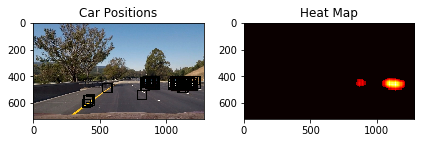

In [101]:
heat = np.zeros_like(window_img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,hot_windows)


# Apply threshold to help remove false positives
heat = apply_threshold(heat,10)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
heatmaps.append(heatmap)
# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(window_img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


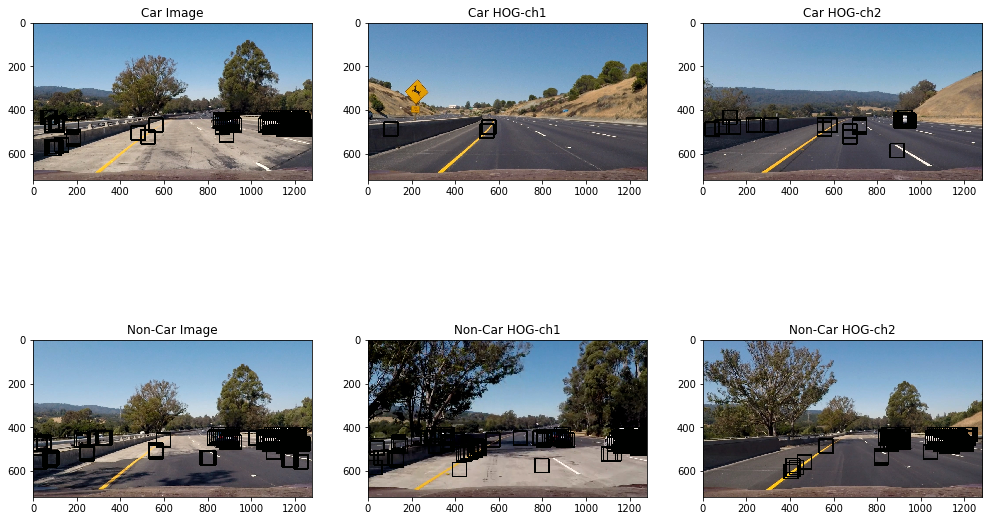

In [102]:
test_imgs_directory=glob.glob('test_images/*.jpg')
window_imgs=[]
hot_windows_set=[]
for test_imgs in test_imgs_directory:
    test_img=mpimg.imread(test_imgs)
    #it is a jpg image and I am using mpimg to read it. Since I used mpimg on png image in the pipeline to train the svn model,
    # I need to scale the jpg image
    test_img = test_img.astype(np.float32)/255.

    #test_img=cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
    draw_image = np.copy(test_img)
    y_start_stop = [400, 640] # Min and max in y to search in slide_window()
    spacial_size_input=(16,16)

    windows = slide_window(test_img, x_start_stop=[None,None], y_start_stop=y_start_stop, 
                        xy_window=(64,64), xy_overlap=(0.85, 0.85))


    hot_windows = search_windows(test_img, windows, svc, X_scaler, color_space=colorspace, 
                            spatial_size=spacial_size_input, hist_bins=number_of_bin, 
                            orient=no_orient, pix_per_cell=no_pix_per_cell, cell_per_block=no_cell_per_block,
                            hog_channel=hog_channel_input, spatial_feat=Spacial_feature_indicator, 
                            hist_feat=Histogram_feature_indicator, hog_feat=HOG_feature_indicator)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 255, 0), thick=5) 
    hot_windows_set.append(hot_windows)
    window_imgs.append(window_img)
    

        
f, ((ax1, ax2,ax3),(ax5,ax6,ax7)) = plt.subplots(2, 3, figsize=(17,10))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(window_imgs[0])
ax1.set_title('Car Image', fontsize=12)
ax2.imshow(window_imgs[1])
ax2.set_title('Car HOG-ch1', fontsize=12)
ax3.imshow(window_imgs[2])
ax3.set_title('Car HOG-ch2', fontsize=12)

ax5.imshow(window_imgs[3])
ax5.set_title('Non-Car Image', fontsize=12)
ax6.imshow(window_imgs[4])
ax6.set_title('Non-Car HOG-ch1', fontsize=12)
ax7.imshow(window_imgs[5])
ax7.set_title('Non-Car HOG-ch2', fontsize=12)





In [103]:
def find_cars(img, ystart, ystop, scale, svc, X_scaler,
              orient, pix_per_cell, cell_per_block,
              spatial_size, hist_bins,hog_channel):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch,
                                     (np.int(imshape[1]/scale),
                                      np.int(imshape[0]/scale)))
    if hog_channel == 'ALL':
        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]
    else: 
        ch1 = ctrans_tosearch[:,:,hog_channel]# Define blocks and steps as above
   
    
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    if hog_channel == 'ALL':
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    bbox_list=[] #https://github.com/preritj/Vechicle-Detection-Tracking
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            if hog_channel == 'ALL':
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            else:
                hog_features = hog_feat1
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features,
                                                          hist_features,
                                                          hog_features)).reshape(1, -1))  
            
            # Scale features and make a prediction  
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),
                              (xbox_left+win_draw,ytop_draw+win_draw+ystart),
                              (255,0,0),8)
                bbox_list.append(((xbox_left, ytop_draw+ystart), #github.com/preritj
                                  (xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    
    return bbox_list

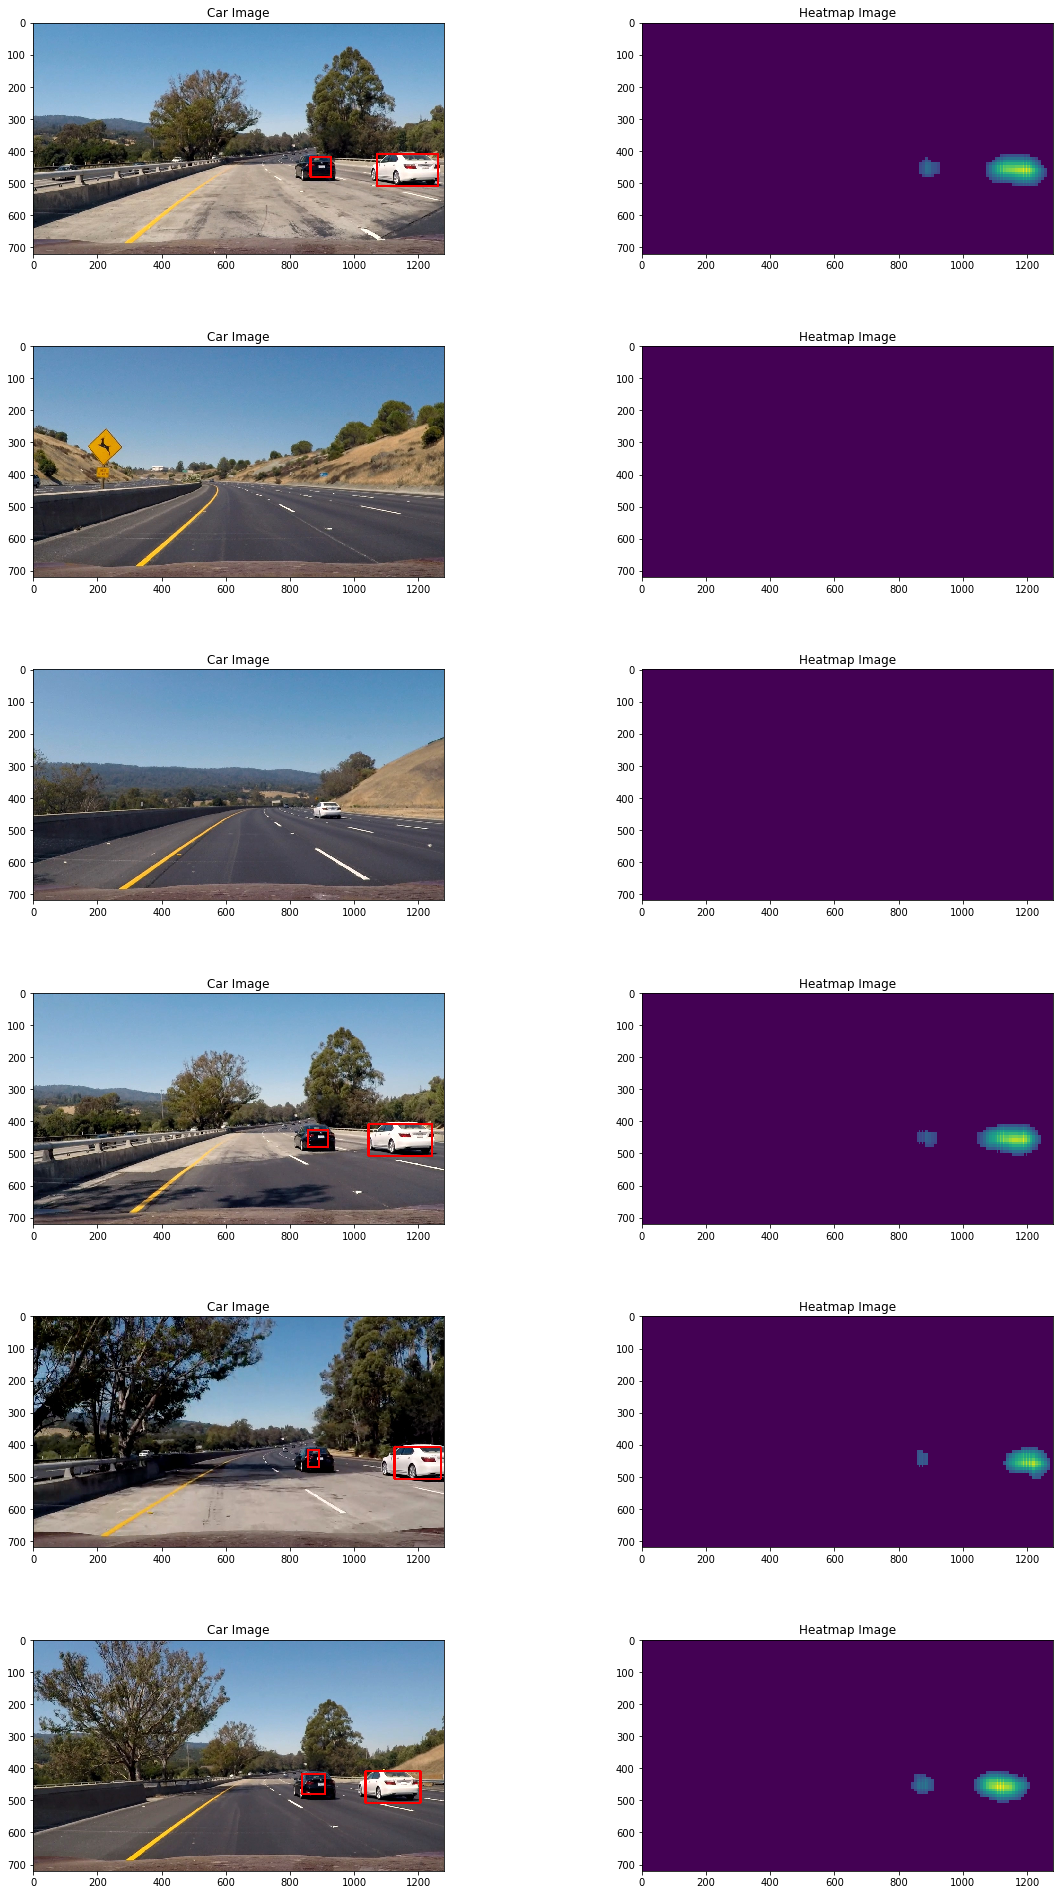

In [104]:
from scipy.ndimage.measurements import label
test_imgs_directory=glob.glob('test_images/*.jpg')

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[int(box[0][1]):int(box[1][1]), int(box[0][0]):int(box[1][0])] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (250,0,0), 6)
    # Return the image
    return img

final_detected_car_img=[]
heatmaps=[]
for hot_windows,test_imgs_file in zip(hot_windows_set,test_imgs_directory):
    test_img=mpimg.imread(test_imgs_file)
    heat = np.zeros_like(test_img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)
    

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,10)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    heatmaps.append(heatmap)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    final_detected_car_img.append(draw_labeled_bboxes(test_img, labels))
    
      
f, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7, ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6, 2, figsize=(20,34))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(final_detected_car_img[0])
ax1.set_title('Car Image', fontsize=12)
ax2.imshow(heatmaps[0])
ax2.set_title('Heatmap Image', fontsize=12)

ax3.imshow(final_detected_car_img[1])
ax3.set_title('Car Image', fontsize=12)
ax4.imshow(heatmaps[1])
ax4.set_title('Heatmap Image', fontsize=12)

ax5.imshow(final_detected_car_img[2])
ax5.set_title('Car Image', fontsize=12)
ax6.imshow(heatmaps[2])
ax6.set_title('Heatmap Image', fontsize=12)

ax7.imshow(final_detected_car_img[3])
ax7.set_title('Car Image', fontsize=12)
ax8.imshow(heatmaps[3])
ax8.set_title('Heatmap Image', fontsize=12)


ax9.imshow(final_detected_car_img[4])
ax9.set_title('Car Image', fontsize=12)
ax10.imshow(heatmaps[4])
ax10.set_title('Heatmap Image', fontsize=12)


ax11.imshow(final_detected_car_img[5])
ax11.set_title('Car Image', fontsize=12)
ax12.imshow(heatmaps[5])
ax12.set_title('Heatmap Image', fontsize=12)



In [106]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

    
    

    
ystart = 400
ystop = 656
scale = 1.
colorspace = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8
pix_per_cell = 10
cell_per_block = 4
hog_channel = 0 # Can be 0, 1, 2, or "ALL"    
spacial_size_input=(16,16)
number_of_bin=32

rectangles=find_cars(test_img, ystart, ystop, scale, svc, X_scaler,
              orient, pix_per_cell, cell_per_block,
              spacial_size_input, number_of_bin,hog_channel)

print(len(rectangles), 'rectangles found in image')

23 rectangles found in image
